In [1]:
import pandas as pd
import matplotlib.pyplot as mp
from sklearn import set_config
from sklearn.preprocessing import StandardScaler as SS
import seaborn as sn
from sklearn.pipeline import Pipeline as PP
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np
set_config(display="diagram")


In [2]:
t=pd.read_csv("Wine.csv")
t.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


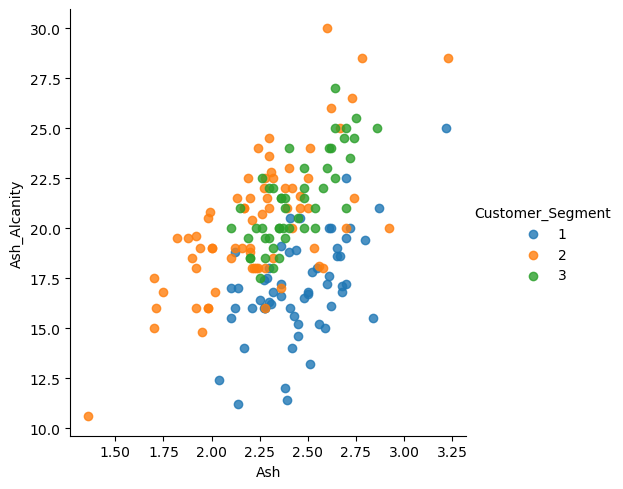

In [3]:
sn.lmplot(data=t,x="Ash",y="Ash_Alcanity",hue="Customer_Segment",fit_reg=False);

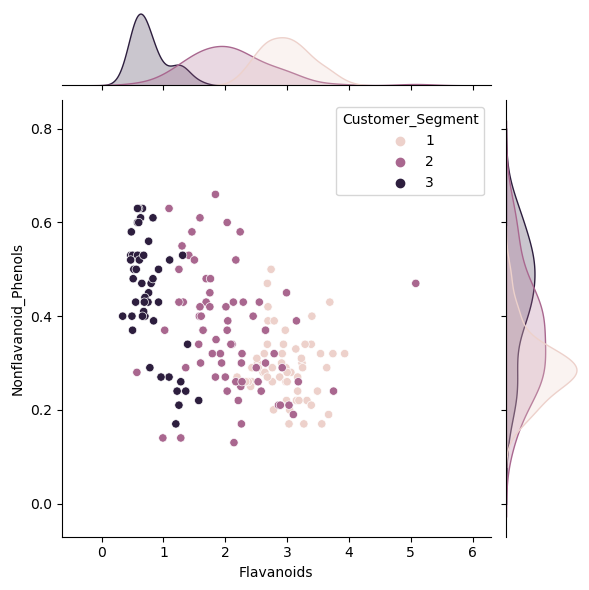

In [4]:
sn.jointplot(data=t,x="Flavanoids",y="Nonflavanoid_Phenols",hue="Customer_Segment");

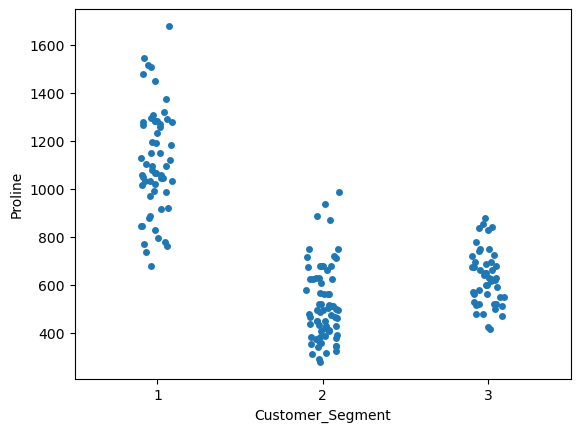

In [5]:
sn.stripplot(x=t["Customer_Segment"],y=t["Proline"]);

In [6]:
t.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
x=t.drop("Customer_Segment",axis=1)
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
pp=PP(
[
    ("ss",SS()),
    ("pca",PCA(n_components=13)),
]
)
pp.fit(x)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA(n_components=13))])

In [9]:
ind=pp.named_steps["pca"].explained_variance_ratio_

In [10]:
su_ind=np.cumsum(pp.named_steps["pca"].explained_variance_ratio_)

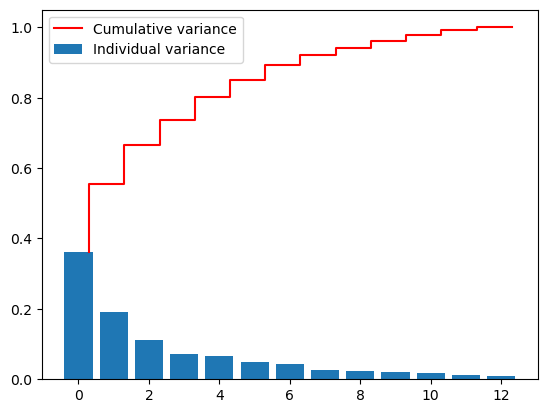

In [11]:
mp.step(np.arange(0.3,len(su_ind)+0.3),y=su_ind,color="r",label="Cumulative variance")
mp.legend();
mp.bar(np.arange(len(ind)),ind,label="Individual variance");
mp.legend();

In [12]:
len(ind)

13

In [13]:
labels=["PCA-"+str(i+1) for i in range(13)]
labels

['PCA-1',
 'PCA-2',
 'PCA-3',
 'PCA-4',
 'PCA-5',
 'PCA-6',
 'PCA-7',
 'PCA-8',
 'PCA-9',
 'PCA-10',
 'PCA-11',
 'PCA-12',
 'PCA-13']

In [14]:
e=[0.01+i*0.09 for i in range(13)]
e

[0.01,
 0.09999999999999999,
 0.19,
 0.28,
 0.37,
 0.45999999999999996,
 0.55,
 0.64,
 0.73,
 0.82,
 0.9099999999999999,
 1.0,
 1.09]

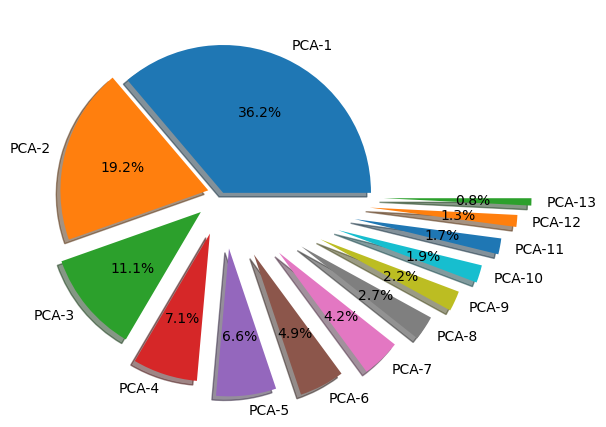

In [15]:
mp.pie(x=ind,autopct="%0.1f%%",labels=labels,explode=e,shadow=True);

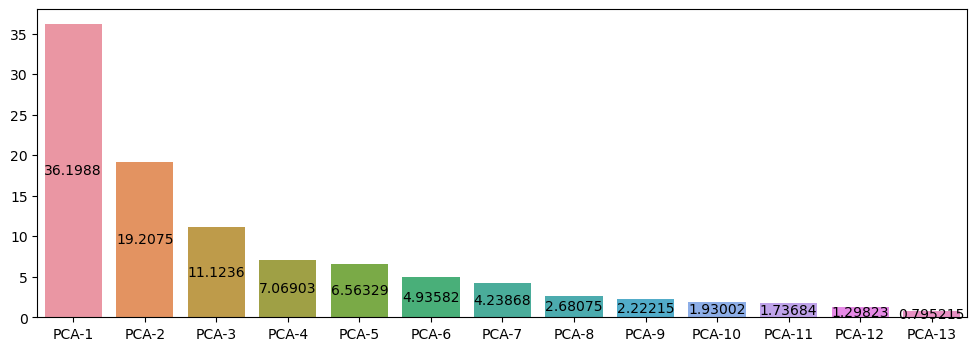

In [16]:
mp.subplots(figsize=(12,4))
ba=sn.barplot(x=labels,y=ind*100)
mp.bar_label(ba.containers[0],label_type='center');

In [17]:
pp=PP(
[
    ("ss",SS()),
    ("pca",PCA(n_components=6)),
]
)
pp.fit(x)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA(n_components=6))])

In [18]:
pp.transform(x)

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605],
       ...,
       [-2.67783946, -2.76089913, -0.94094188,  0.31203475,  1.271355  ,
         0.27306792],
       [-2.38701709, -2.29734668, -0.5506962 , -0.68828455,  0.81395522,
         1.17878298],
       [-3.20875816, -2.76891957,  1.01391366,  0.59690319, -0.89519259,
         0.29609218]])